# 福州大学教务处教学通知分析报告

## 通知所属部门统计及其占比

部门统计：
发布部门
【教学运行】    1628
【实践科】      946
【教研教改】     480
【质量办】      362
【综合科】      287
【计划科】      199
【教学通知】      66
【教材中心】      65
Name: count, dtype: int64

部门占比：
发布部门
【教学运行】    40.366972
【实践科】     23.456484
【教研教改】    11.901810
【质量办】      8.975948
【综合科】      7.116291
【计划科】      4.934292
【教学通知】     1.636499
【教材中心】     1.611703
Name: count, dtype: float64


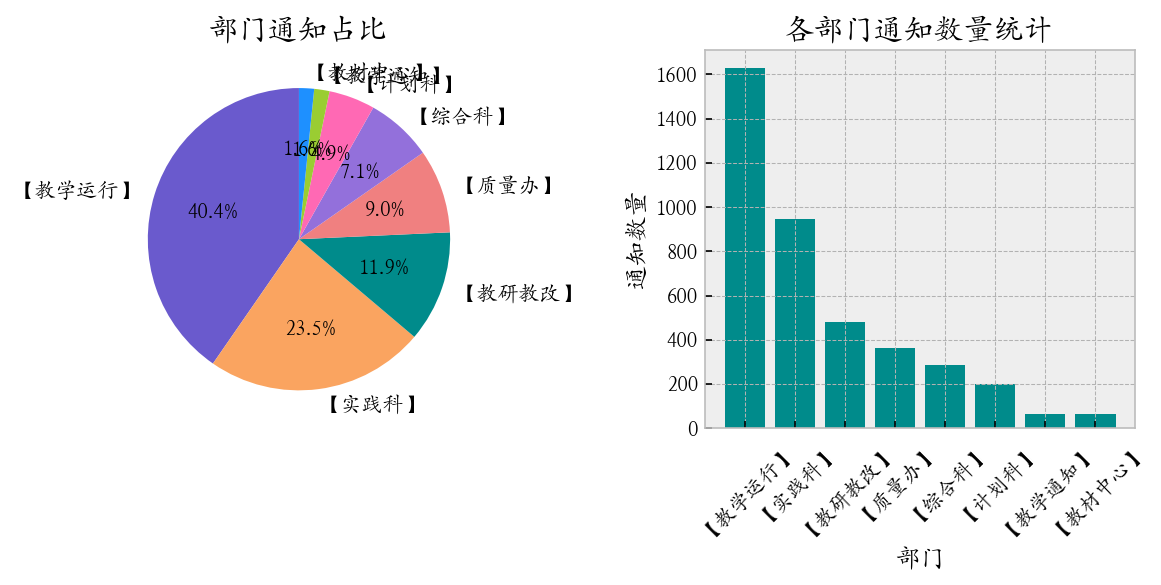

In [3]:
from matplotlib import pyplot as plt
import pandas as pd
from scipy.stats import chi2_contingency

# 设置全局样式
plt.style.use("bmh")
plt.rcParams["font.sans-serif"] = ["Kai"]
plt.rcParams["axes.unicode_minus"] = False


df = pd.read_csv(
    "/Users/zhangyifeng/Desktop/collection-ai/task2/832403326_task2/教务处教学通知.csv"
)
subset_df = df.iloc[1:4034]


department_counts = subset_df["发布部门"].value_counts()  # 数的是
department_percentages = (department_counts / len(subset_df)) * 100

print("部门统计：")
print(department_counts)
print("\n部门占比：")
print(department_percentages)

# 创建figure，设置子图
fig, axes = plt.subplots(1, 2, figsize=(8, 4), dpi=150)


axes[0].pie(
    department_counts,  # 需要手动传入数据
    labels=department_counts.index,
    autopct="%1.1f%%",  # 百分比格式
    startangle=90,  # 起始角度
    colors=[
        "#6A5ACD",
        "#FAA460",
        "#008B8B",
        "#F08080",
        "#9370DB",
        "#FF69B4",
        "#9ACD32",
        "#1E90FF",
    ],
)
axes[0].set_title("部门通知占比")  # 注意：标题是子图层级的属性，注意绘画的层次

# 右侧
axes[1].bar(department_counts.index, department_counts, color="#008B8B")  # x  # y
axes[1].set_title("各部门通知数量统计")
axes[1].set_xlabel("部门")
axes[1].set_ylabel("通知数量")
axes[1].tick_params(axis="x", rotation=45)  # x 轴标签旋转 45 度

# 调整子图之间的间距
plt.tight_layout()

# 显示图形
plt.show()

## 下载次数与通知人的关系

In [10]:
# 数据清洗
df["下载次数"] = pd.to_numeric(
    df["下载次数"], errors="coerce"
)  # df[]是series数据，将下载次数转为int,NaN，注意对原来的df做出了修改

df_cleaned = df.dropna(
    subset=["下载次数"]
).copy()  # 清洗掉没有数据的注意此处创建独立副本，因为后面对一个切面后的副本进行修改（添加了一列），Pandas 不能保证修改会同步到原始数据或完全独立，可能会引发意外结果。
# 数据操作
department_stats = (
    df_cleaned.groupby("发布部门")["下载次数"]
    .agg(["mean", "sum", "count"])
    .reset_index()
)  # 注意，.groupby后会将发布部门作为层级索引
department_stats.columns = ["发布部门", "平均下载次数", "总下载次数", "通知数量"]
# print(df_cleaned)
# 打印结果
print(department_stats)

# 部门标签编码（将分类变量转为数值变量），有时可以方便操作

     发布部门       平均下载次数     总下载次数  通知数量
0   【实践科】  1549.601732  357958.0   231
1  【教学运行】  1023.217949  159622.0   156
2  【教学通知】   537.409091   11823.0    22
3  【教材中心】   575.785714   32244.0    56
4  【教研教改】  1138.950000   91116.0    80
5   【综合科】   751.909091   16542.0    22
6   【计划科】  1555.040000   38876.0    25
7   【质量办】   808.512821   63064.0    78


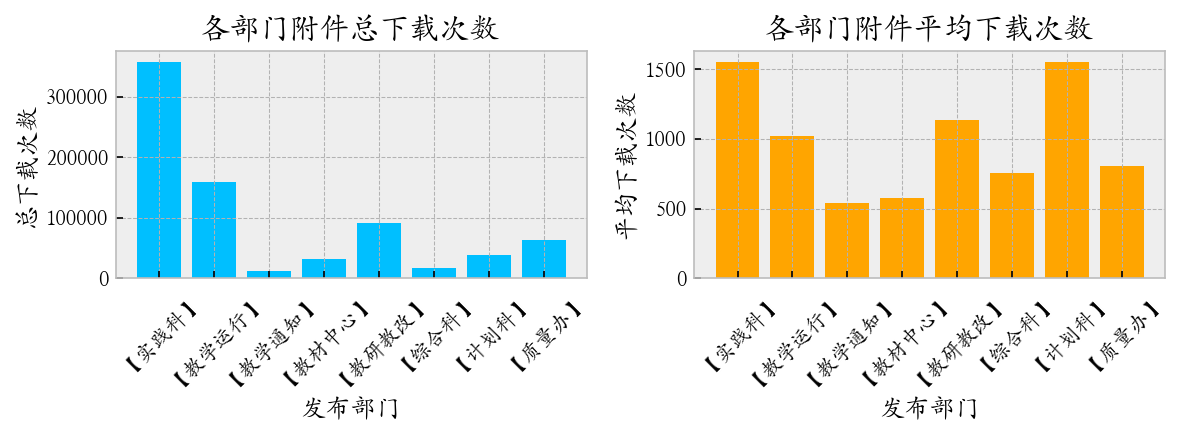

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3), dpi=150)  # 1行2列子图布局

# 子图 1：各部门附件总下载次数
axes[0].bar(
    department_stats["发布部门"], department_stats["总下载次数"], color="#00BFFF"
)
axes[0].set_xlabel("发布部门")
axes[0].set_ylabel("总下载次数")
axes[0].set_title("各部门附件总下载次数")
axes[0].tick_params(axis="x", rotation=45)  # 旋转 x 轴刻度标签

# 子图 2：各部门附件平均下载次数
axes[1].bar(
    department_stats["发布部门"], department_stats["平均下载次数"], color="orange"
)
axes[1].set_xlabel("发布部门")
axes[1].set_ylabel("平均下载次数")
axes[1].set_title("各部门附件平均下载次数")
axes[1].tick_params(axis="x", rotation=45)  # 旋转 x 轴刻度标签

plt.tight_layout()

# 显示图形
plt.show()

In [23]:
# 计算分点
low_threshold = df_cleaned["下载次数"].quantile(0.33)
high_threshold = df_cleaned["下载次数"].quantile(0.66)


# 划分等级
def categorize_downloads(value):
    if value <= low_threshold:
        return "低"
    elif value <= high_threshold:
        return "中"
    else:
        return "高"


df_cleaned["下载次数分类"] = df_cleaned["下载次数"].apply(
    categorize_downloads
)  # 注意背后逻辑，将该操作赋给了新列，不然只是返回一个新的series列，不会对原先df修改，在原df后添加新列

categories = ["低", "中", "高"]
df_cleaned["下载次数分类"] = pd.Categorical(
    df_cleaned["下载次数分类"], categories=categories, ordered=True
)

# 构建列联表（交叉表）
contingency_table = pd.crosstab(
    df_cleaned["发布部门"], df_cleaned["下载次数分类"]
)  # 该方法创建交叉表（列联表），交叉表 是显示两个分类变量（类别型数据）之间关系的表格，表格的每一格显示的是分类变量组合的频数。
print("列联表：")
print(contingency_table)

列联表：
下载次数分类   低   中    高
发布部门               
【实践科】   53  69  109
【教学运行】  63  52   41
【教学通知】  15   7    0
【教材中心】  35  11   10
【教研教改】  20  22   38
【综合科】    6  14    2
【计划科】    3   6   16
【质量办】   26  40   12


In [13]:
from scipy.stats import chi2_contingency
import numpy as np

# 独立性检验
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"卡方统计量: {chi2:.2f}")
print(f"P 值: {p}")
print(f"自由度: {dof}")
print("期望频数矩阵:")
print(np.round(expected, 2))

# 判断显著性
if p < 0.05:
    print("发布部门和下载次数分类有显著关系")
else:
    print("发布部门和下载次数分类无显著关系")

# 计算标准化残差
observed = contingency_table.values  # 获取观察频数矩阵
residuals = (observed - expected) / np.sqrt(expected)

print("\n观察频数矩阵:")
print(observed)
print("\n期望频数矩阵:")
print(np.round(expected, 2))
print("\n标准化残差矩阵:")
print(np.round(residuals, 2))

# 残差分析
print("\n残差分析:")
for i in range(residuals.shape[0]):  # 遍历行
    for j in range(residuals.shape[1]):  # 遍历列
        if abs(residuals[i, j]) > 1.96:  # 检查是否超出临界值
            print(
                f"单元格 ({i+1}, {j+1}) 的标准化残差为 {residuals[i, j]:.2f}，超出1.96，有显著差异。"
            )
        else:
            print(
                f"单元格 ({i+1}, {j+1}) 的标准化残差为 {residuals[i, j]:.2f}，无显著差异。"
            )

卡方统计量: 106.19
P 值: 3.0504263168744023e-16
自由度: 14
期望频数矩阵:
[[76.2  76.2  78.61]
 [51.46 51.46 53.09]
 [ 7.26  7.26  7.49]
 [18.47 18.47 19.06]
 [26.39 26.39 27.22]
 [ 7.26  7.26  7.49]
 [ 8.25  8.25  8.51]
 [25.73 25.73 26.54]]
发布部门和下载次数分类有显著关系

观察频数矩阵:
[[ 53  69 109]
 [ 63  52  41]
 [ 15   7   0]
 [ 35  11  10]
 [ 20  22  38]
 [  6  14   2]
 [  3   6  16]
 [ 26  40  12]]

期望频数矩阵:
[[76.2  76.2  78.61]
 [51.46 51.46 53.09]
 [ 7.26  7.26  7.49]
 [18.47 18.47 19.06]
 [26.39 26.39 27.22]
 [ 7.26  7.26  7.49]
 [ 8.25  8.25  8.51]
 [25.73 25.73 26.54]]

标准化残差矩阵:
[[-2.66 -0.82  3.43]
 [ 1.61  0.08 -1.66]
 [ 2.87 -0.1  -2.74]
 [ 3.85 -1.74 -2.07]
 [-1.24 -0.85  2.07]
 [-0.47  2.5  -2.01]
 [-1.83 -0.78  2.57]
 [ 0.05  2.81 -2.82]]

残差分析:
单元格 (1, 1) 的标准化残差为 -2.66，超出1.96，有显著差异。
单元格 (1, 2) 的标准化残差为 -0.82，无显著差异。
单元格 (1, 3) 的标准化残差为 3.43，超出1.96，有显著差异。
单元格 (2, 1) 的标准化残差为 1.61，无显著差异。
单元格 (2, 2) 的标准化残差为 0.08，无显著差异。
单元格 (2, 3) 的标准化残差为 -1.66，无显著差异。
单元格 (3, 1) 的标准化残差为 2.87，超出1.96，有显著差异。
单元格 (3, 2) 的标准化残差为 -0

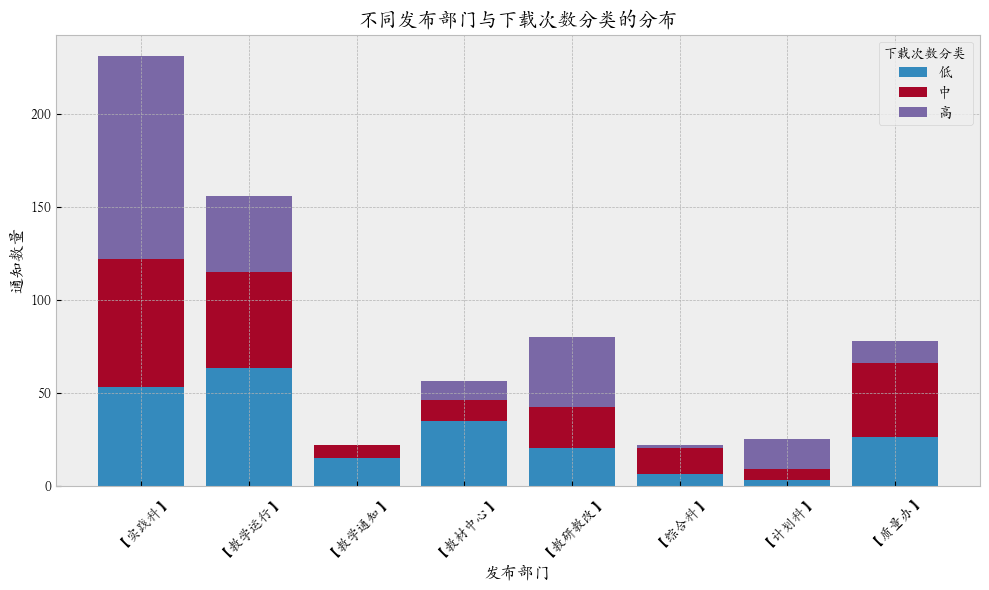

In [14]:
# 可视化
import matplotlib.pyplot as plt
import numpy as np

# 数据
categories = contingency_table.columns
departments = contingency_table.index
values = contingency_table.values


fig, ax = plt.subplots(figsize=(10, 6))

# 绘制堆叠柱状图
x = np.arange(len(departments))  # x 轴的位置
bottom = np.zeros(len(departments))  # 堆叠底部初始值为 0

for i, category in enumerate(categories):
    ax.bar(x, values[:, i], label=category, bottom=bottom)
    bottom += values[:, i]  # 更新堆叠底部

ax.set_title("不同发布部门与下载次数分类的分布")
ax.set_xlabel("发布部门")
ax.set_ylabel("通知数量")

ax.set_xticks(x)
ax.set_xticklabels(departments, rotation=45)

ax.legend(title="下载次数分类")

plt.tight_layout()
plt.show()

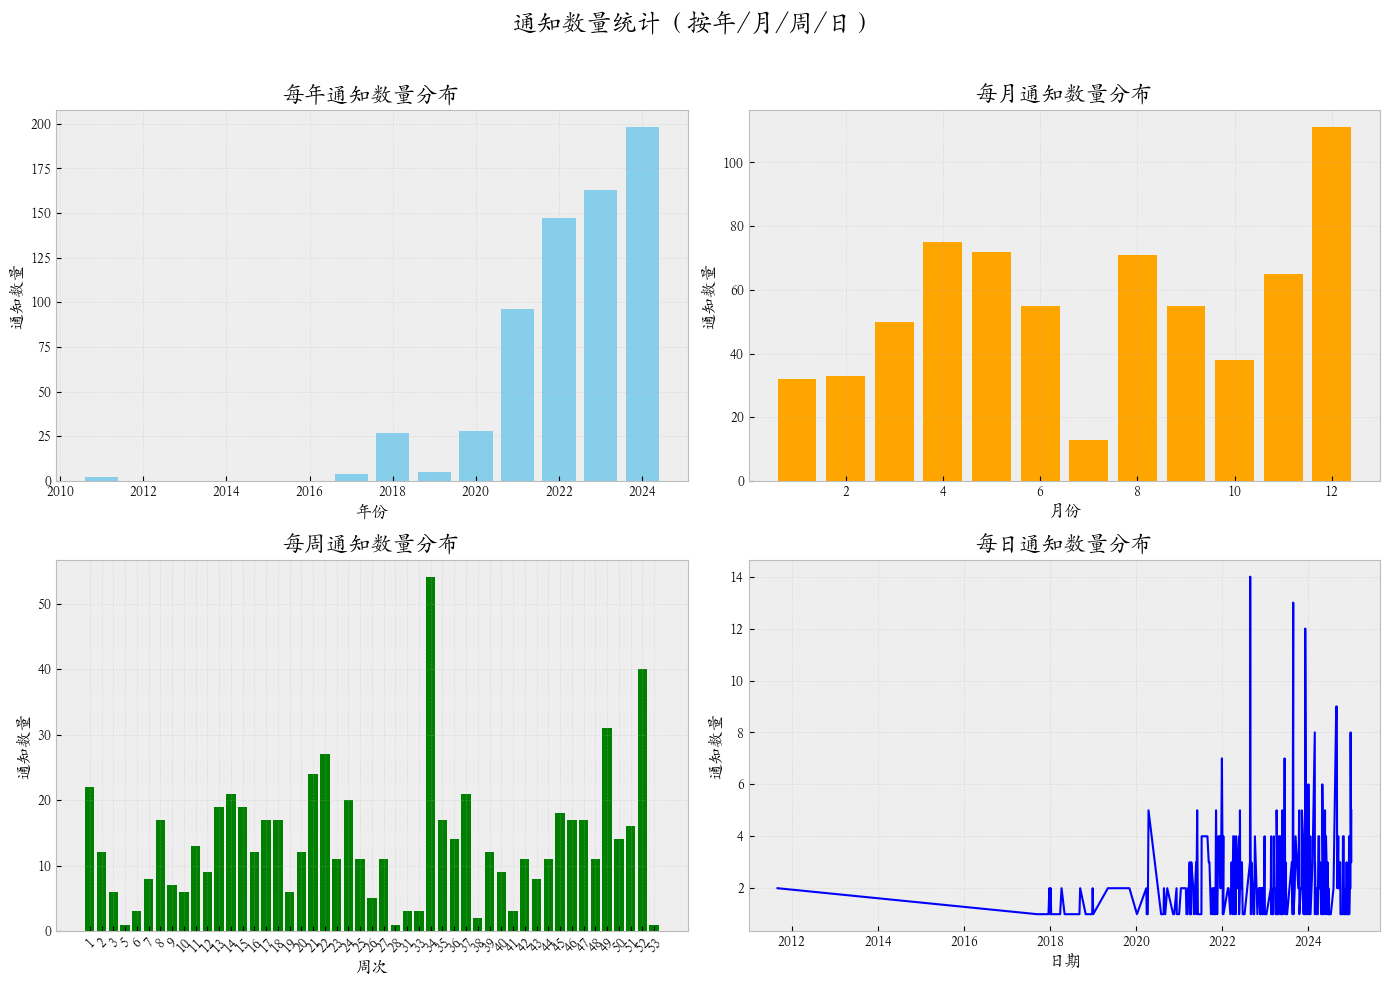

In [16]:
df["发布日期"] = pd.to_datetime(df["发布日期"], errors="coerce")

df = df.dropna(subset=["发布日期"])

daily_notifications = df.groupby(
    "发布日期"
).size()  # 这里.size注意与.count区分，前者是会计算非空值

df["年份"] = df["发布日期"].dt.year
yearly_notifications = df.groupby("年份").size()

df["月份"] = df["发布日期"].dt.month
monthly_notifications = df.groupby("月份").size()

# df['周次'] = df['发布日期'].dt.isocalendar().week  # ISO标准的周次
# weekly_notifications = df.groupby(df['发布日期'].dt.to_period("W")).size()
df["周次"] = df["发布日期"].dt.isocalendar().week  # ISO标准的周次
weekly_notifications = df.groupby("周次").size()

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("通知数量统计（按年/月/周/日）", fontsize=18)

# 年
axes[0, 0].bar(yearly_notifications.index, yearly_notifications.values, color="skyblue")
axes[0, 0].set_title("每年通知数量分布", fontsize=16)
axes[0, 0].set_xlabel("年份", fontsize=12)
axes[0, 0].set_ylabel("通知数量", fontsize=12)
axes[0, 0].grid(alpha=0.3)

# 2. 每月
axes[0, 1].bar(
    monthly_notifications.index, monthly_notifications.values, color="orange"
)
axes[0, 1].set_title("每月通知数量分布", fontsize=16)
axes[0, 1].set_xlabel("月份", fontsize=12)
axes[0, 1].set_ylabel("通知数量", fontsize=12)
axes[0, 1].grid(alpha=0.3)

# 3. 每周
axes[1, 0].bar(
    weekly_notifications.index.astype(str), weekly_notifications.values, color="green"
)
axes[1, 0].set_title("每周通知数量分布", fontsize=16)
axes[1, 0].set_xlabel("周次", fontsize=12)
axes[1, 0].set_ylabel("通知数量", fontsize=12)
axes[1, 0].tick_params(axis="x", rotation=45)
axes[1, 0].grid(alpha=0.3)

# 4. 每日
axes[1, 1].plot(
    daily_notifications.index, daily_notifications.values, color="blue", linewidth=1.5
)
axes[1, 1].set_title("每日通知数量分布", fontsize=16)
axes[1, 1].set_xlabel("日期", fontsize=12)
axes[1, 1].set_ylabel("通知数量", fontsize=12)
axes[1, 1].grid(alpha=0.3)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

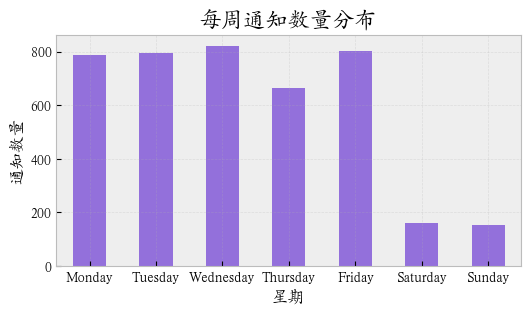

In [5]:
df["星期几"] = df["发布日期"].dt.day_name()
weekday_notifications = df.groupby("星期几").size()

# 按星期顺序排序
weekday_order = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]
weekday_notifications = weekday_notifications.reindex(weekday_order)

# 绘制柱状图 - 每周通知分布
plt.figure(figsize=(6, 3))
weekday_notifications.plot(kind="bar", color="#9370DB")
plt.title("每周通知数量分布", fontsize=16)
plt.xlabel("星期", fontsize=12)
plt.ylabel("通知数量", fontsize=12)
plt.xticks(rotation=0)
plt.grid(alpha=0.3)
plt.show()

高下载次数阈值: 2102.4000000000005
高下载次数通知分布:
发布部门
【实践科】     49
【教学运行】     7
【计划科】      5
【教研教改】     5
【质量办】      1
Name: count, dtype: int64
高下载次数通知数量: 67


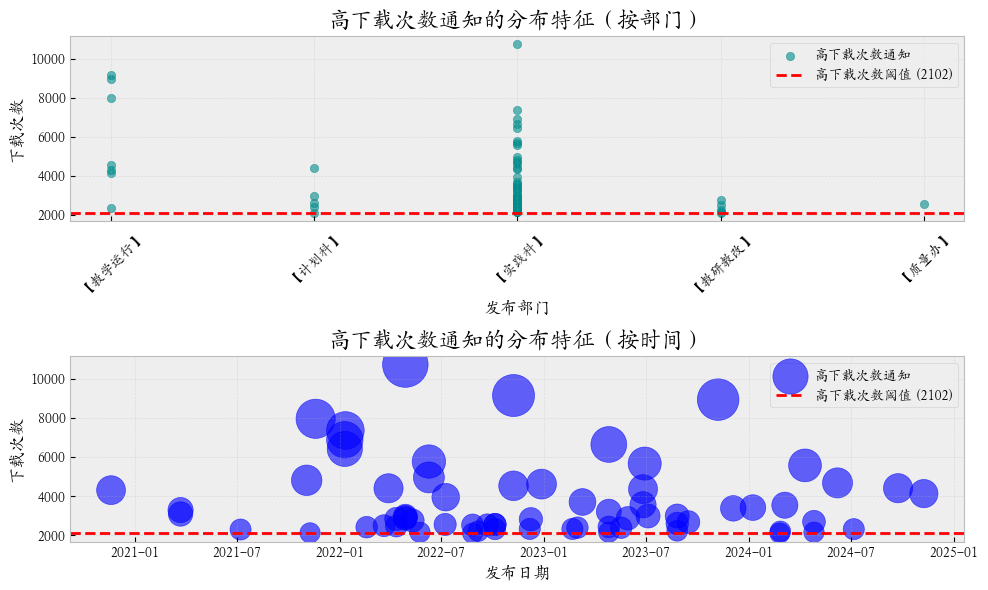

In [21]:
# 筛选高下载次数的通知
threshold = df_cleaned["下载次数"].quantile(0.9)  # 90%分位数
high_downloads = df_cleaned[df_cleaned["下载次数"] > threshold]

print(f"高下载次数阈值: {threshold}")
print("高下载次数通知分布:")
print(high_downloads["发布部门"].value_counts())
print("高下载次数通知数量:", len(high_downloads))

fig, axes = plt.subplots(2, 1, figsize=(10, 6))  # 2 行 1 列布局

# 散点图
axes[0].scatter(
    high_downloads["发布部门"],
    high_downloads["下载次数"],
    alpha=0.6,
    color="#008B8B",
    label="高下载次数通知",
)
axes[0].axhline(
    threshold, color="red", linestyle="--", label=f"高下载次数阈值 ({threshold:.0f})"
)
axes[0].set_title("高下载次数通知的分布特征（按部门）", fontsize=16)
axes[0].set_xlabel("发布部门", fontsize=12)
axes[0].set_ylabel("下载次数", fontsize=12)
axes[0].tick_params(axis="x", rotation=45)
axes[0].legend()
axes[0].grid(alpha=0.3)

# 气泡图
axes[1].scatter(
    high_downloads["发布日期"],
    high_downloads["下载次数"],
    s=high_downloads["下载次数"] / 10,
    alpha=0.6,
    color="blue",
    label="高下载次数通知",
)
axes[1].axhline(
    threshold, color="red", linestyle="--", label=f"高下载次数阈值 ({threshold:.0f})"
)
axes[1].set_title("高下载次数通知的分布特征（按时间）", fontsize=16)
axes[1].set_xlabel("发布日期", fontsize=12)
axes[1].set_ylabel("下载次数", fontsize=12)
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()